# Image augmentation

In this notebook, we will use Keras ImageDataGenerator to generate augmented images to train the model with more data. After generating those new images, I will process them to obtain the bottleneck features and finally train the best model of the last step (NasNet large with 1 final neuron to classify) using all this data.

### Importing the original data 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

X = np.load('data/processed_data/X_331.npy')
y = np.load('data/processed_data/y.npy')

X.shape                                

(400, 331, 331, 3)

I will first separate the data into train and test set so the augmented will be conducted only on the training set (so the model cannot see the test set)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)
X_train.shape

(340, 331, 331, 3)

### Generating the bottleneck features

In [14]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest')


# Generating the first batch
augmented_1 = datagen.flow(X_train, y_train, batch_size=340, seed=42)
augmented_x_1, augmented_y_1 = augmented_1[0]

# Generating the second batch
augmented_2 = datagen.flow(X_train, y_train, batch_size=340, seed=23)
augmented_x_2, augmented_y_2 = augmented_2[0]

# Combining the augmented data
augmented_x = np.concatenate((augmented_x_1, augmented_x_2))
augmented_y = np.concatenate((augmented_y_1, augmented_y_1 ))

In [15]:
augmented_x = np.concatenate((augmented_x_1, augmented_x_2))
augmented_y = np.concatenate((augmented_y_1, augmented_y_1 ))

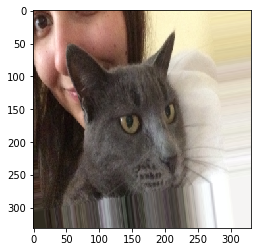

In [5]:
plt.imshow(augmented_x_2[10])

In [18]:
combined_X = np.concatenate((X_train, augmented_x))
combined_y = np.concatenate((y_train, augmented_y))
combined_X.shape

(1020, 331, 331, 3)

In [ ]:
from keras.applications.nasnet import NASNetLarge

nasnet = NASNetLarge(include_top=False, weights='imagenet', input_shape=(331,331,3), pooling='avg')
combined_bottleneck = nasnet.predict(combined_X)
combined_bottleneck.shape

In [ ]:
np.save('data/bottleneck_features/combined_bottleneck', combined_bottleneck)

In [29]:
xx, yy = augmented[2]
np.mean(yy)

0.5

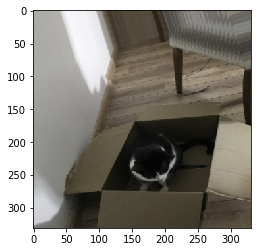

In [25]:
plt.imshow(xx[9])

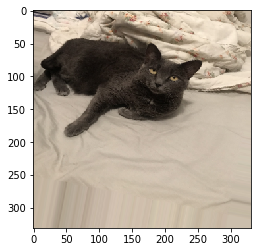

In [23]:
plt.imshow(xx[9])

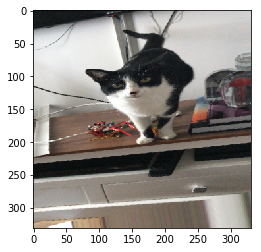

In [21]:
plt.imshow(xx[9])

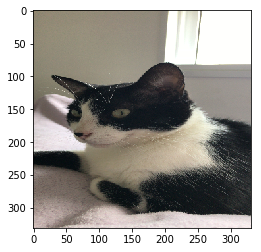

In [29]:
plt.imshow(X_331[0])

In [3]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest')

In [4]:
#augmented = datagen.flow(X_331, batch_size=100, seed=42, save_to_dir='data/data_augmentation')
augmented = datagen.flow(X_331, batch_size=10, seed=42)

augmented_X = augmented[0]
augmented_X.shape

(10, 331, 331, 3)

In [40]:
x[0].shape

(60, 331, 331, 3)

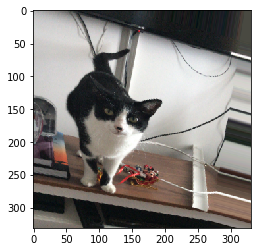

In [46]:
plt.imshow(augmented_X[9])
plt.show()

In [11]:
x[0].shape

(32, 331, 331, 3)

In [41]:
from keras.applications.nasnet import NASNetLarge

nasnet = NASNetLarge(include_top=False, weights='imagenet', input_shape=(331,331,3), pooling='avg')

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
augmented_bottleneck = nasnet.predict(augmented_X)
augmented_bottleneck.shape

In [ ]:
np.save('data/bottleneck_features/augmented_bottleneck', augmented_bottleneck)